In [3]:
from sklearn.datasets import fetch_openml
creditg = fetch_openml(data_id='1046')#1504 1464
creditg.keys()

X, y = creditg.data, creditg.target
X.shape, y.shape


((15545, 5), (15545,))

In [4]:
import matplotlib.pyplot as plt
for i in range(X.shape[1]):
    plt.xlabel(f"{i}: {creditg.feature_names[i]}")
    plt.ylabel("Classificação")
    plt.scatter(X.iloc[:,i], y)
    plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
X, y = creditg.data, creditg.target
X.shape, y.shape
print(y)

0        0
1        0
2        1
3        0
4        0
        ..
15540    1
15541    1
15542    1
15543    1
15544    0
Name: state, Length: 15545, dtype: category
Categories (2, object): ['0', '1']


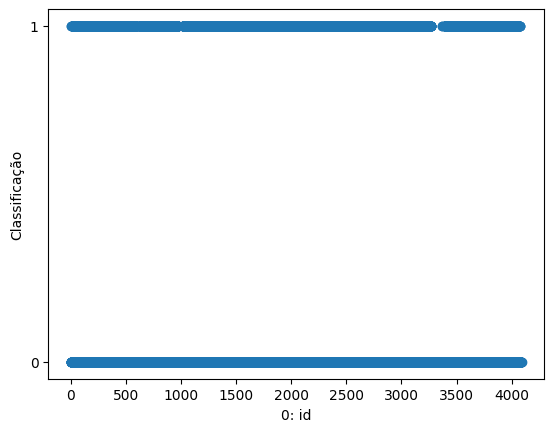

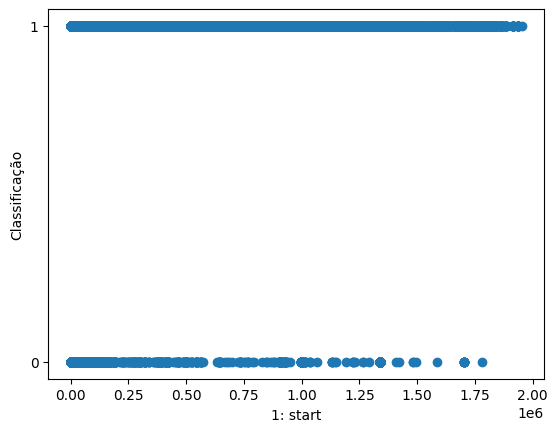

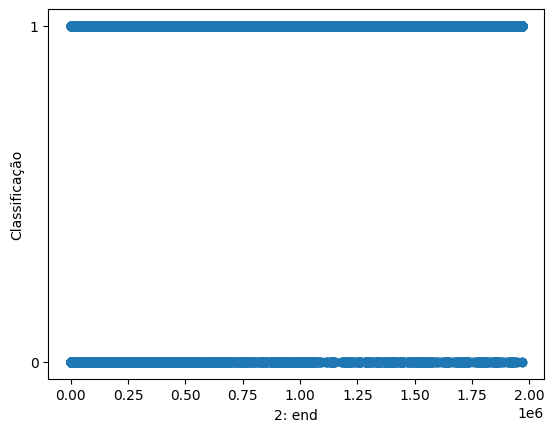

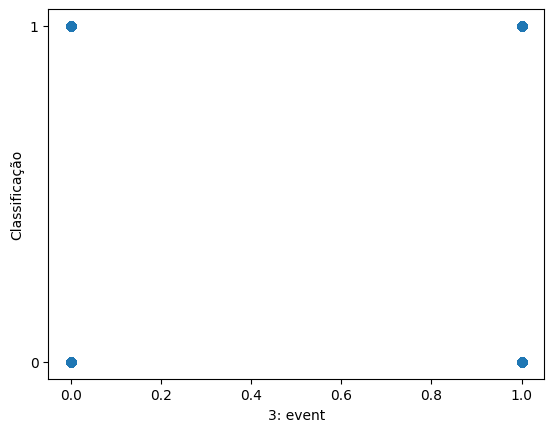

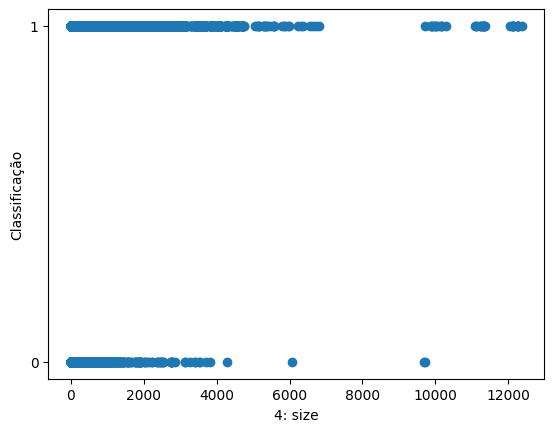

In [ ]:
import matplotlib.pyplot as plt
for i in range(X.shape[1]):
    plt.xlabel(f"{i}: {creditg.feature_names[i]}")
    plt.ylabel("Classificação")
    plt.scatter(X.iloc[:,i], y)
    plt.show()

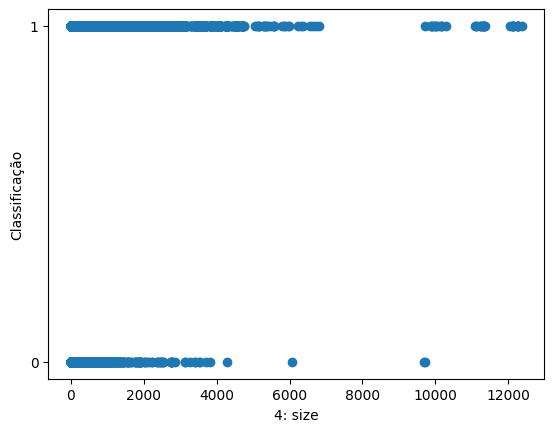

In [ ]:
import matplotlib.pyplot as plt

selecaoitem = 4

X2 = X.iloc[:,selecaoitem:selecaoitem+1]
plt.xlabel(f"{selecaoitem}: {creditg.feature_names[selecaoitem]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
plt.show()

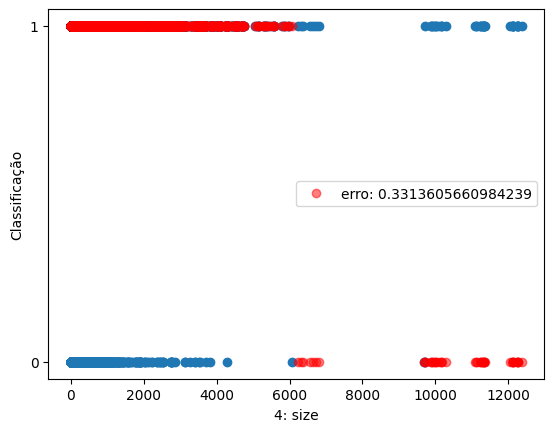

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class ClassificadorLinear():
    def __init__(self):
        self.lrmodel = LinearRegression()
    def fit(self, X, y):
        self.lrmodel.fit(X,y)
    def predict(self, X):
        ypred = self.lrmodel.predict(X)
        ypred = (ypred<1.3).astype(int)
        return ypred

plt.xlabel(f"{selecaoitem}: {creditg.feature_names[selecaoitem]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
modelo = ClassificadorLinear()
modelo.fit(X2,y)
ypred = modelo.predict(X2)
erro = mean_squared_error(y, ypred)
plt.plot(X2, ypred, 'ro', label=f"erro: {erro}", alpha=0.5)
plt.legend()
plt.show()



In [ ]:
acuracia = sum(y==ypred)/len(y)
acuracia , 1- erro

(0.0, 0.6686394339015761)

In [ ]:
modelo = ClassificadorLinear()
modelo.fit(X,y)

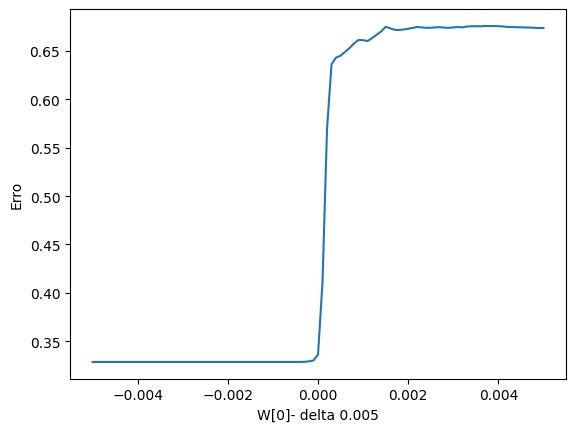

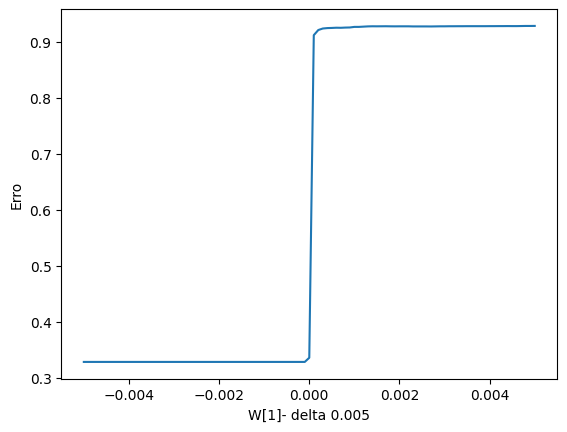

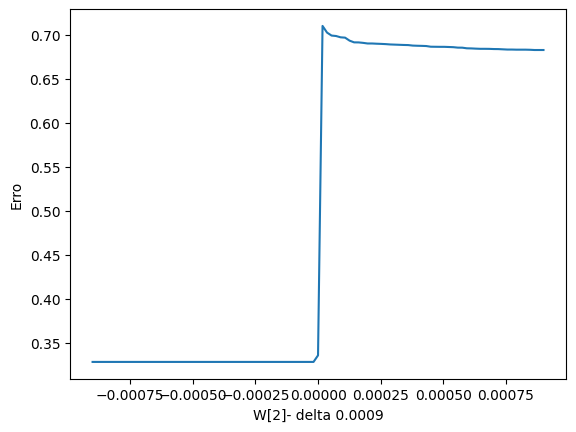

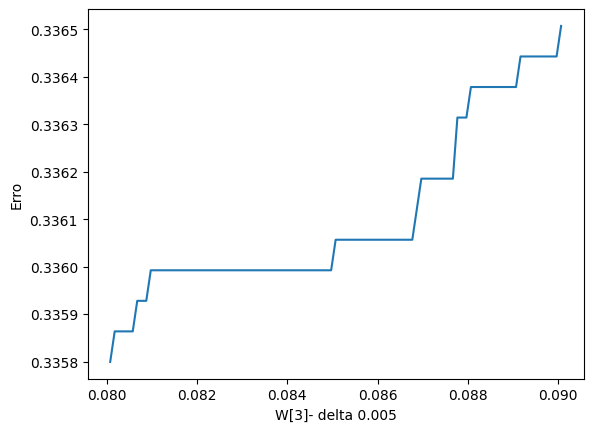

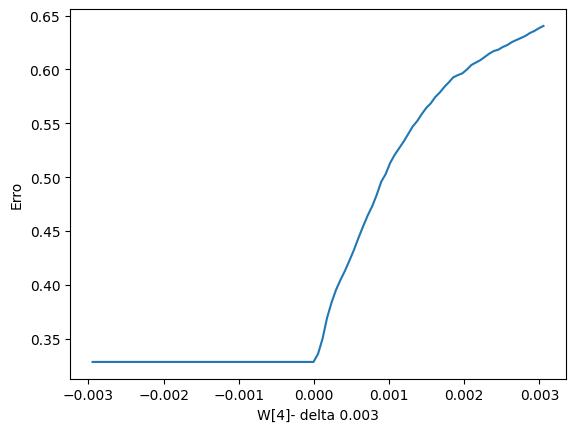

In [ ]:
import numpy as np

delta = [0.005,0.005,0.0009,0.005,0.003]

def plot(i):
    erros = []
    coef = modelo.lrmodel.coef_[i]
    ws = np.linspace(coef-delta[i], coef+delta[i], 101)
    for w in ws:
        modelo.lrmodel.coef_[i] = w
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    modelo.lrmodel.coef_[i] = coef
    plt.ylabel("Erro")
    plt.xlabel(f"W[{i}]- delta {delta[i]}")
    plt.plot(ws,erros)
    plt.show()

for i in range(len(modelo.lrmodel.coef_)):
    plot(i)

In [ ]:
from sklearn.datasets import load_wine
monksprob = load_wine()
#monksprob = fetch_openml(data_id='1504')#1504 1464
monksprob.keys()

X, y = monksprob.data, monksprob.target
X.shape, y.shape, set(y)


((178, 13), (178,), {0, 1, 2})

In [ ]:
import matplotlib.pylab as plt
for i in range(X.shape[1]):
    print(i)
    plt.scatter(X[:,i], y)
    plt.show()

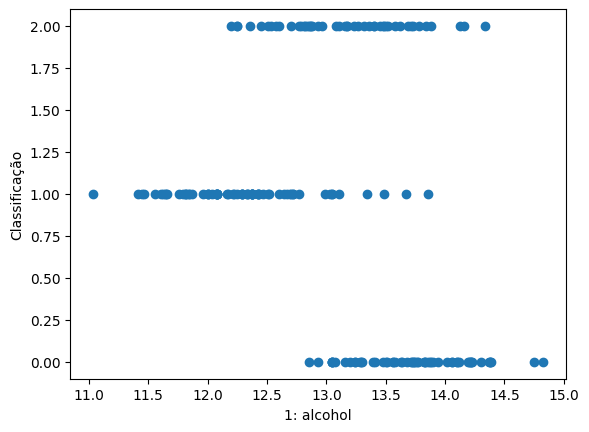

In [ ]:

X1 = X[:,0:1]
indice = 0
plt.xlabel(f"{indice}: {monksprob.feature_names[indice]}")
plt.ylabel("Classificação")
plt.scatter(X1, y)
plt.show()

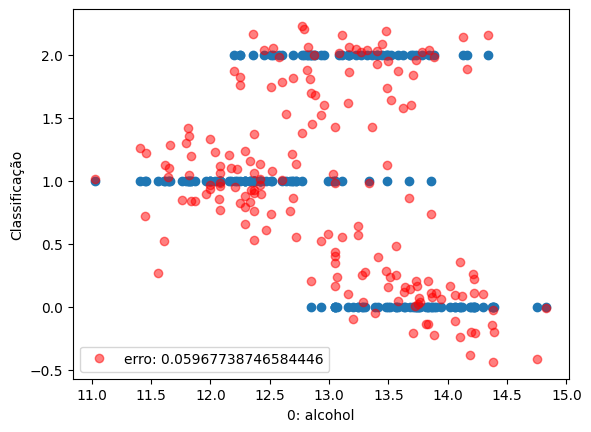

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class ClassificadorLinear():
    def __init__(self):
        self.lrmodel = LinearRegression()
    def fit(self, X, y):
        self.lrmodel.fit(X,y)
    def predict(self, X):
        ypred = self.lrmodel.predict(X)
        #ypred = (ypred>2).astype(int)
        return ypred

plt.xlabel(f"{indice}: {monksprob.feature_names[indice]}")
plt.ylabel("Classificação")
plt.scatter(X1, y)
modelo = ClassificadorLinear()
modelo.fit(X,y)
ypred = modelo.predict(X)
erro = mean_squared_error(y, ypred)
plt.plot(X1, ypred, 'ro', label=f"erro: {erro}", alpha=0.5)
plt.legend()
plt.show()

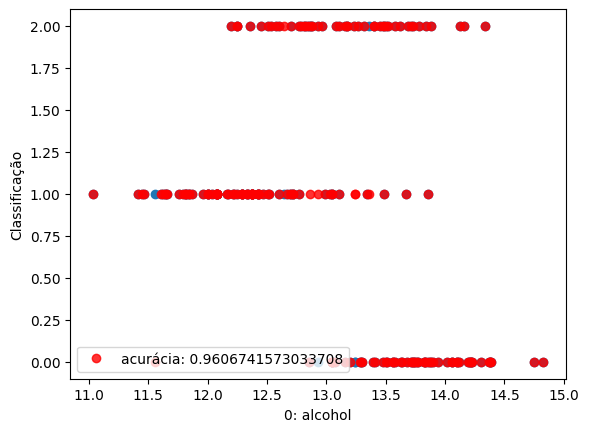

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import numpy as np


class ClassificadorLinear():
    def __init__(self):
        self.lrmodel = LinearRegression()
    def fit(self, X, y):
        self.lrmodel.fit(X,y)
    def predict(self, X):
        ypred = self.lrmodel.predict(X)
        #ypred = (ypred>0.5).astype(int)
        ypred = np.rint(ypred)
        return ypred

plt.xlabel(f"{indice}: {monksprob.feature_names[indice]}")
plt.ylabel("Classificação")
plt.scatter(X1, y)
modelo = ClassificadorLinear()
modelo.fit(X,y)
ypred = modelo.predict(X)
acuracia = accuracy_score(y, ypred)
plt.plot(X1, ypred, 'ro', label=f"acurácia: {acuracia}", alpha=0.8)
plt.legend()
plt.show()

/home/fabricio.ferreira/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


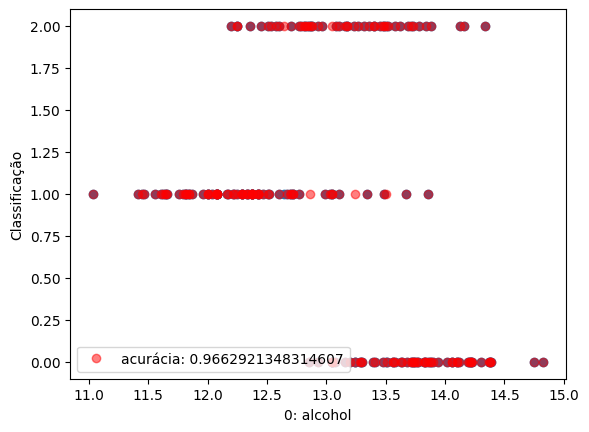

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

plt.xlabel(f"{indice}: {monksprob.feature_names[indice]}")
plt.ylabel("Classificação")
plt.scatter(X1, y)
modelo = LogisticRegression()
modelo.fit(X,y)
ypred = modelo.predict(X)
acuracia = accuracy_score(y, ypred)
plt.plot(X1, ypred, 'ro', label=f"acurácia: {acuracia}", alpha=0.5)
plt.legend()
plt.show()


In [ ]:
modelo.intercept_

array([-0.03096564,  0.07940076, -0.04843512])

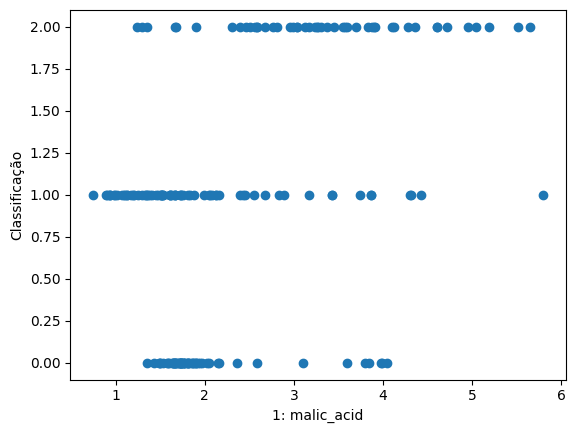

In [ ]:

X2 = X[:,1:2]
indice = 1
plt.xlabel(f"{indice}: {monksprob.feature_names[indice]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
plt.show()

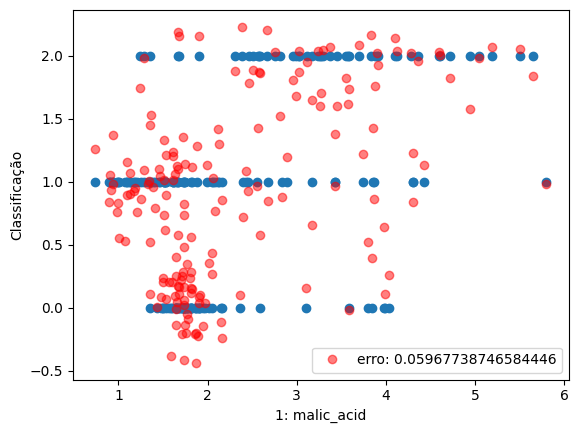

In [ ]:
plt.xlabel(f"{indice}: {monksprob.feature_names[indice]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
modelo = ClassificadorLinear()
modelo.fit(X,y)
ypred = modelo.predict(X)
erro = mean_squared_error(y, ypred)
plt.plot(X2, ypred, 'ro', label=f"erro: {erro}", alpha=0.5)
plt.legend()
plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

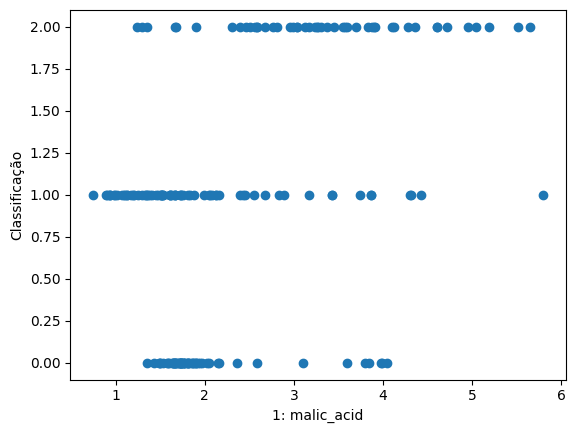

In [ ]:

plt.xlabel(f"{indice}: {monksprob.feature_names[indice]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
modelo = ClassificadorLinear()
modelo.fit(X,y)
ypred = modelo.predict(X)
acuracia = accuracy_score(y, ypred)
plt.plot(X2, ypred, 'ro', label=f"acurácia: {acuracia}", alpha=0.8)
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import fetch_openml
creditg = fetch_openml(data_id='1046')#1504 1464
creditg.keys()

X, y = creditg.data, creditg.target
X.shape, y.shape


((15545, 5), (15545,))

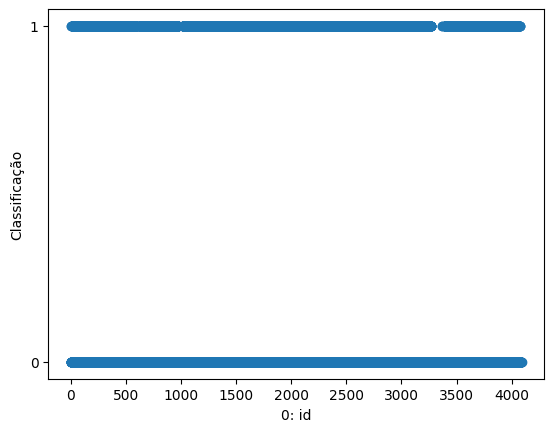

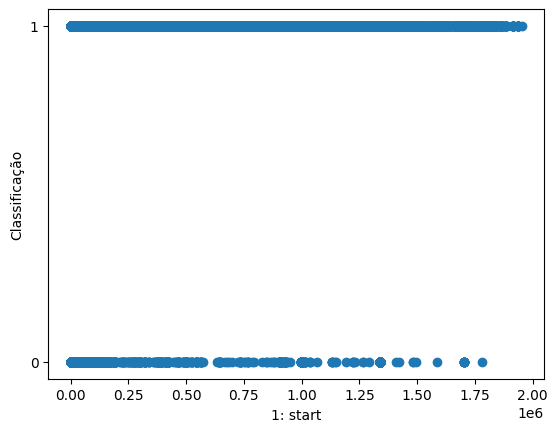

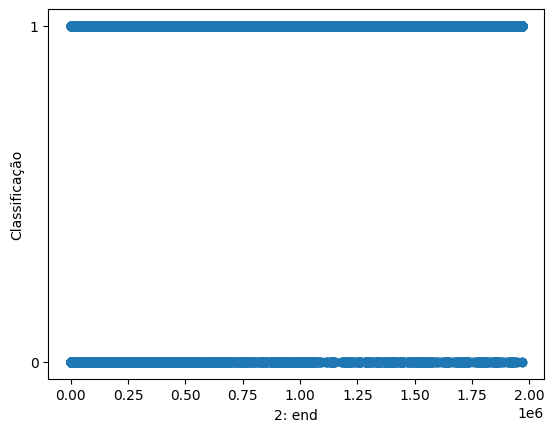

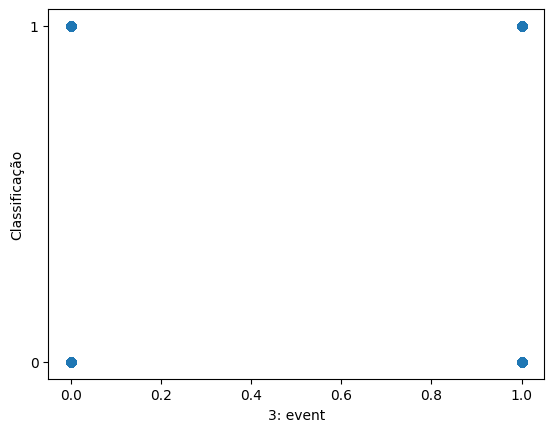

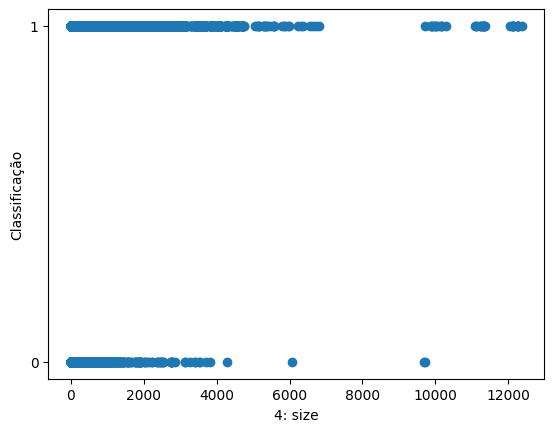

In [ ]:
import matplotlib.pyplot as plt
for i in range(X.shape[1]):
    plt.xlabel(f"{i}: {creditg.feature_names[i]}")
    plt.ylabel("Classificação")
    plt.scatter(X.iloc[:,i], y)
    plt.show()

In [ ]:
X, y = creditg.data, creditg.target
X.shape, y.shape
print(y)

0        0
1        0
2        1
3        0
4        0
        ..
15540    1
15541    1
15542    1
15543    1
15544    0
Name: state, Length: 15545, dtype: category
Categories (2, object): ['0', '1']


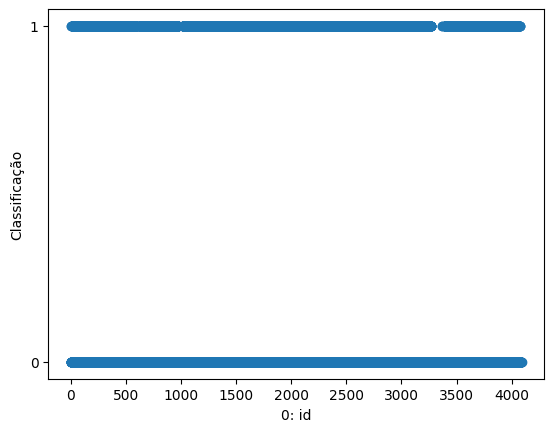

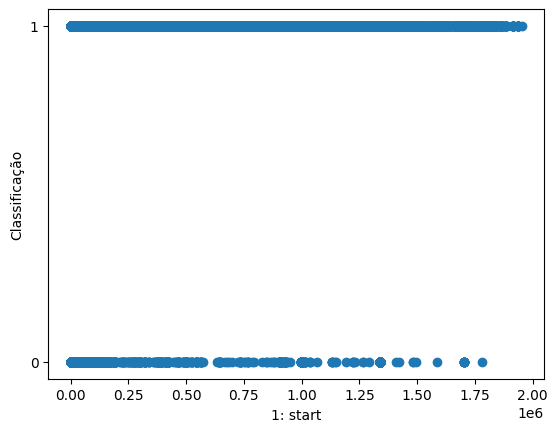

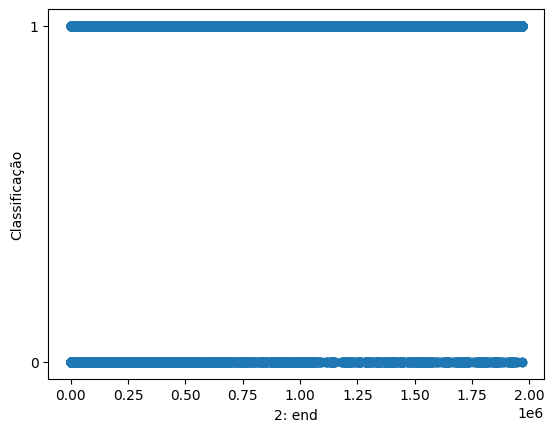

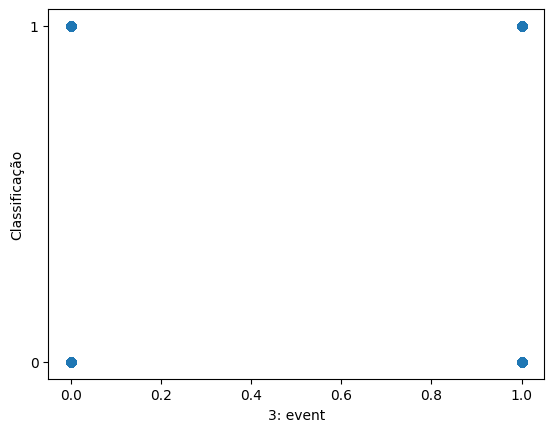

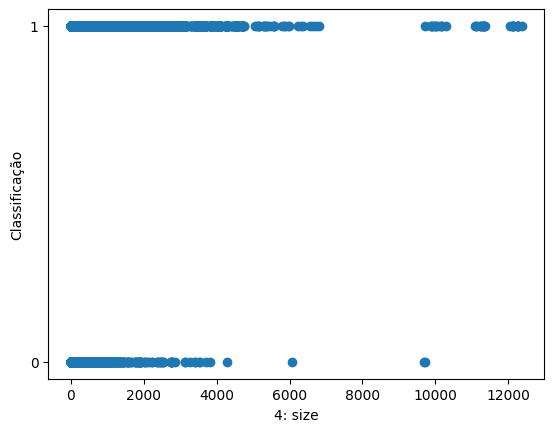

In [ ]:
import matplotlib.pyplot as plt
for i in range(X.shape[1]):
    plt.xlabel(f"{i}: {creditg.feature_names[i]}")
    plt.ylabel("Classificação")
    plt.scatter(X.iloc[:,i], y)
    plt.show()

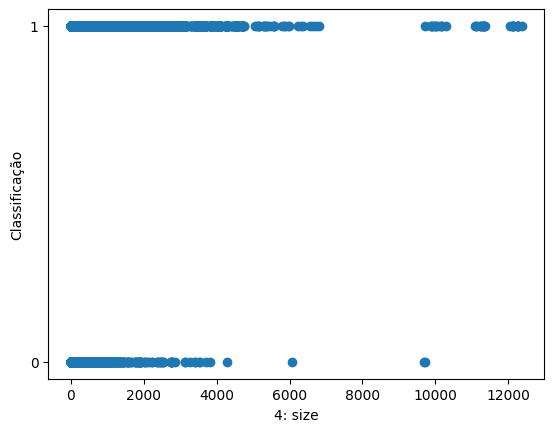

In [ ]:
import matplotlib.pyplot as plt

selecaoitem = 4

X2 = X.iloc[:,selecaoitem:selecaoitem+1]
plt.xlabel(f"{selecaoitem}: {creditg.feature_names[selecaoitem]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
plt.show()

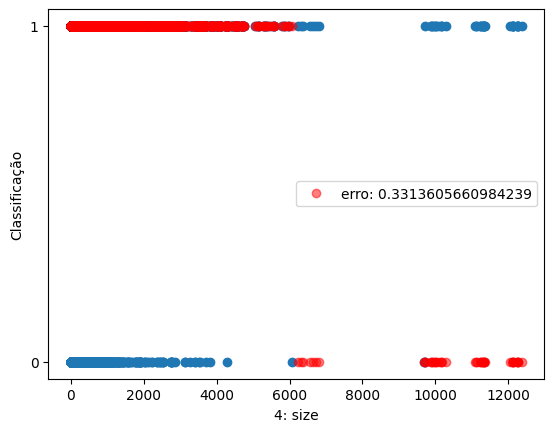

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class ClassificadorLinear():
    def __init__(self):
        self.lrmodel = LinearRegression()
    def fit(self, X, y):
        self.lrmodel.fit(X,y)
    def predict(self, X):
        ypred = self.lrmodel.predict(X)
        ypred = (ypred<1.3).astype(int)
        return ypred

plt.xlabel(f"{selecaoitem}: {creditg.feature_names[selecaoitem]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
modelo = ClassificadorLinear()
modelo.fit(X2,y)
ypred = modelo.predict(X2)
erro = mean_squared_error(y, ypred)
plt.plot(X2, ypred, 'ro', label=f"erro: {erro}", alpha=0.5)
plt.legend()
plt.show()



In [ ]:
acuracia = sum(y==ypred)/len(y)
acuracia , 1- erro

(0.0, 0.6686394339015761)

In [ ]:
modelo = ClassificadorLinear()
modelo.fit(X,y)

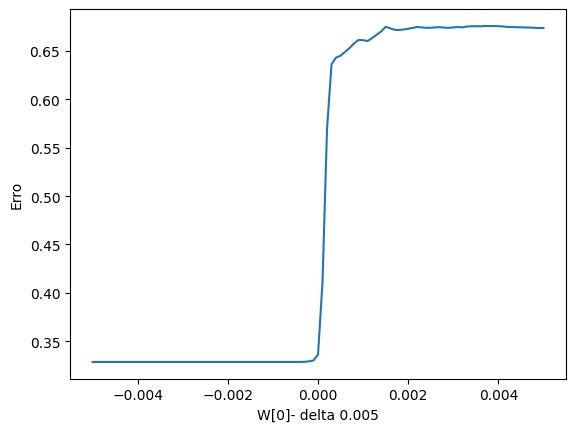

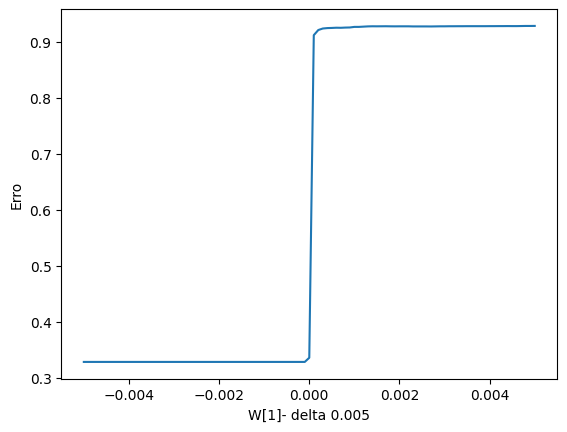

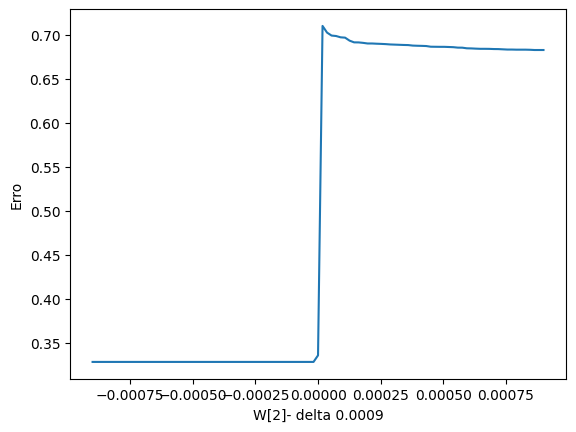

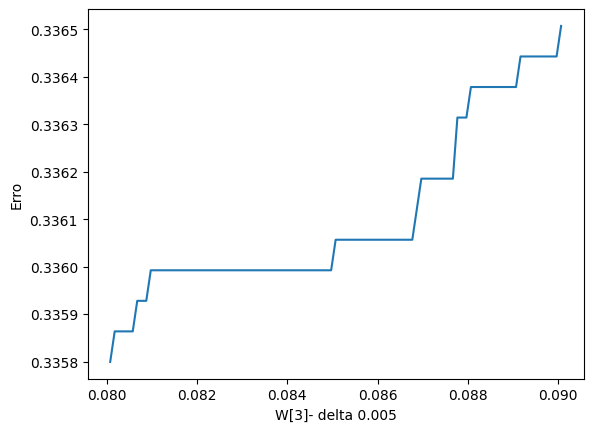

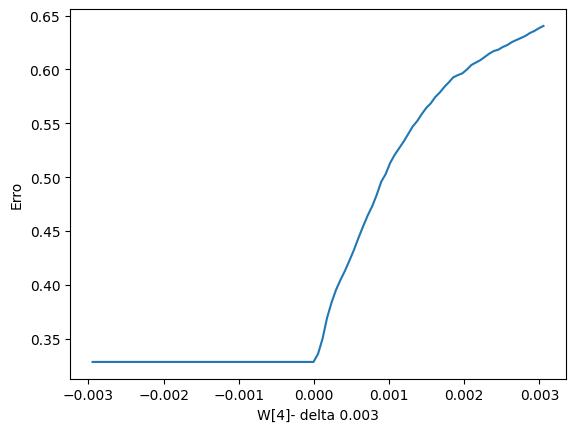

In [ ]:
import numpy as np

delta = [0.005,0.005,0.0009,0.005,0.003]

def plot(i):
    erros = []
    coef = modelo.lrmodel.coef_[i]
    ws = np.linspace(coef-delta[i], coef+delta[i], 101)
    for w in ws:
        modelo.lrmodel.coef_[i] = w
        ypred = modelo.predict(X)
        erro = mean_squared_error(y, ypred)
        erros.append(erro)
    modelo.lrmodel.coef_[i] = coef
    plt.ylabel("Erro")
    plt.xlabel(f"W[{i}]- delta {delta[i]}")
    plt.plot(ws,erros)
    plt.show()

for i in range(len(modelo.lrmodel.coef_)):
    plot(i)

In [ ]:
from sklearn.datasets import load_wine
monksprob = load_wine()
#monksprob = fetch_openml(data_id='1504')#1504 1464
monksprob.keys()

X, y = monksprob.data, monksprob.target
X.shape, y.shape, set(y)


((178, 13), (178,), {0, 1, 2})

In [ ]:
import matplotlib.pylab as plt
for i in range(X.shape[1]):
    print(i)
    plt.scatter(X[:,i], y)
    plt.show()

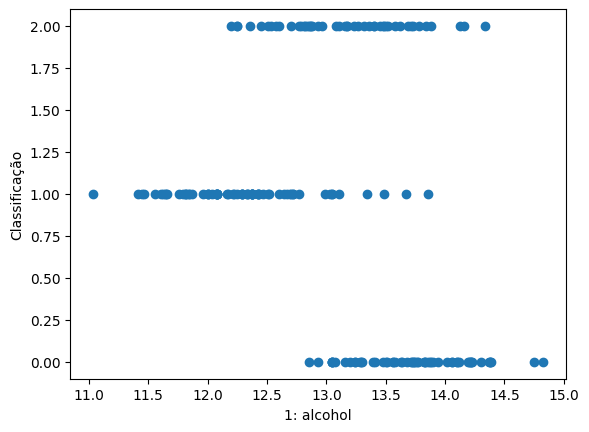

In [ ]:

X1 = X[:,0:1]
indice = 0
plt.xlabel(f"{indice}: {monksprob.feature_names[indice]}")
plt.ylabel("Classificação")
plt.scatter(X1, y)
plt.show()

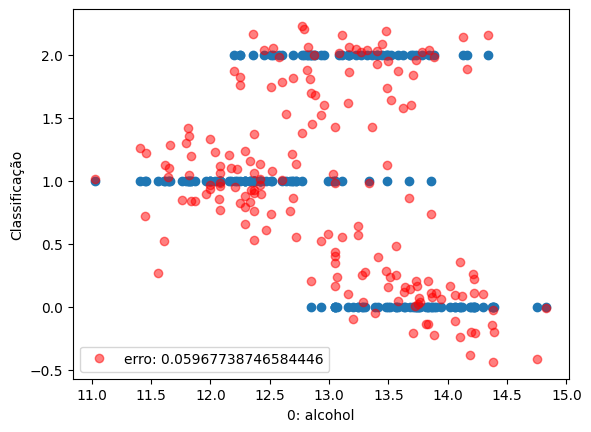

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class ClassificadorLinear():
    def __init__(self):
        self.lrmodel = LinearRegression()
    def fit(self, X, y):
        self.lrmodel.fit(X,y)
    def predict(self, X):
        ypred = self.lrmodel.predict(X)
        #ypred = (ypred>2).astype(int)
        return ypred

plt.xlabel(f"{indice}: {monksprob.feature_names[indice]}")
plt.ylabel("Classificação")
plt.scatter(X1, y)
modelo = ClassificadorLinear()
modelo.fit(X,y)
ypred = modelo.predict(X)
erro = mean_squared_error(y, ypred)
plt.plot(X1, ypred, 'ro', label=f"erro: {erro}", alpha=0.5)
plt.legend()
plt.show()

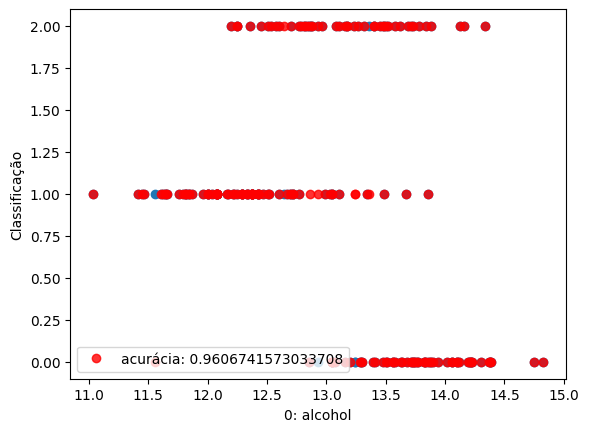

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import numpy as np


class ClassificadorLinear():
    def __init__(self):
        self.lrmodel = LinearRegression()
    def fit(self, X, y):
        self.lrmodel.fit(X,y)
    def predict(self, X):
        ypred = self.lrmodel.predict(X)
        #ypred = (ypred>0.5).astype(int)
        ypred = np.rint(ypred)
        return ypred

plt.xlabel(f"{indice}: {monksprob.feature_names[indice]}")
plt.ylabel("Classificação")
plt.scatter(X1, y)
modelo = ClassificadorLinear()
modelo.fit(X,y)
ypred = modelo.predict(X)
acuracia = accuracy_score(y, ypred)
plt.plot(X1, ypred, 'ro', label=f"acurácia: {acuracia}", alpha=0.8)
plt.legend()
plt.show()

/home/fabricio.ferreira/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


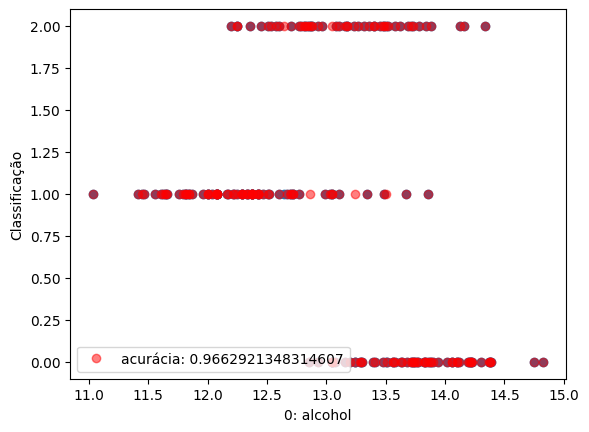

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

plt.xlabel(f"{indice}: {monksprob.feature_names[indice]}")
plt.ylabel("Classificação")
plt.scatter(X1, y)
modelo = LogisticRegression()
modelo.fit(X,y)
ypred = modelo.predict(X)
acuracia = accuracy_score(y, ypred)
plt.plot(X1, ypred, 'ro', label=f"acurácia: {acuracia}", alpha=0.5)
plt.legend()
plt.show()


In [ ]:
modelo.intercept_

array([-0.03096564,  0.07940076, -0.04843512])

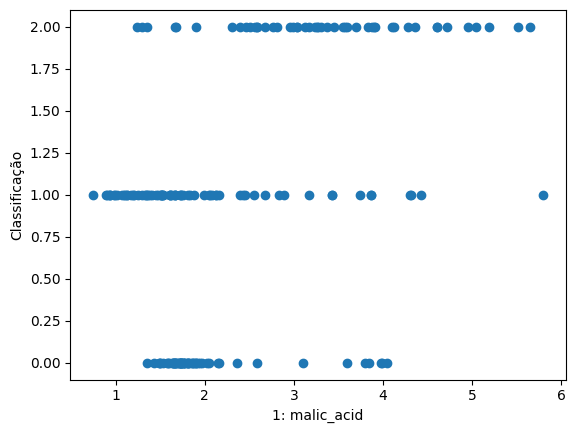

In [ ]:

X2 = X[:,1:2]
indice = 1
plt.xlabel(f"{indice}: {monksprob.feature_names[indice]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
plt.show()

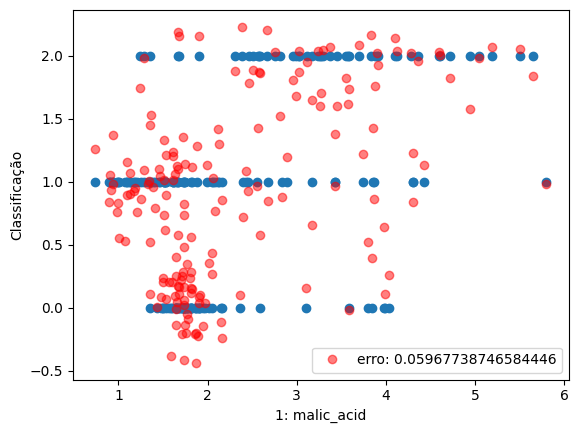

In [ ]:
plt.xlabel(f"{indice}: {monksprob.feature_names[indice]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
modelo = ClassificadorLinear()
modelo.fit(X,y)
ypred = modelo.predict(X)
erro = mean_squared_error(y, ypred)
plt.plot(X2, ypred, 'ro', label=f"erro: {erro}", alpha=0.5)
plt.legend()
plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

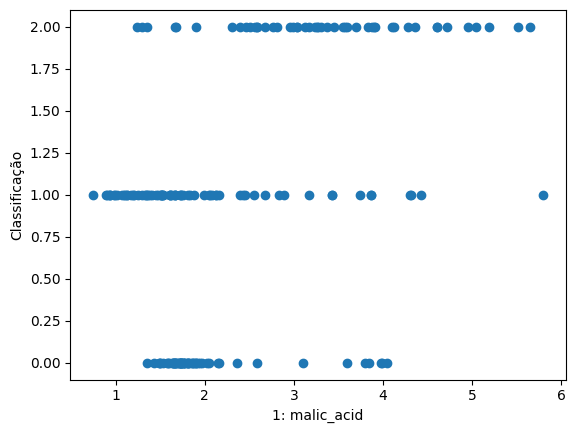

In [ ]:

plt.xlabel(f"{indice}: {monksprob.feature_names[indice]}")
plt.ylabel("Classificação")
plt.scatter(X2, y)
modelo = ClassificadorLinear()
modelo.fit(X,y)
ypred = modelo.predict(X)
acuracia = accuracy_score(y, ypred)
plt.plot(X2, ypred, 'ro', label=f"acurácia: {acuracia}", alpha=0.8)
plt.legend()
plt.show()